In [1]:
# NumPy
import numpy as np # type: ignore

# Dataframe operations
import pandas as pd # type: ignore

# Data visualization
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Scalers
from sklearn.preprocessing import MinMaxScaler # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.utils import shuffle # type: ignore

# Models
from sklearn.linear_model import LogisticRegression #logistic regression # type: ignore
from sklearn.ensemble import RandomForestClassifier #Random Forest # type: ignore
from sklearn.neighbors import KNeighborsClassifier #KNN # type: ignore
from sklearn.neural_network import MLPClassifier # type: ignore
from sklearn.ensemble import RandomForestRegressor # type: ignore
from sklearn.naive_bayes import GaussianNB #Naive bayes # type: ignore
from sklearn.tree import DecisionTreeClassifier #Decision Tree # type: ignore
from sklearn import svm #support vector Machine # type: ignore
from sklearn.linear_model import Perceptron # type: ignore
from sklearn.ensemble import GradientBoostingClassifier # type: ignore

from sklearn.metrics import confusion_matrix #for confusion matrix # type: ignore
from sklearn.model_selection import train_test_split #training and testing data split# type: ignore
from sklearn import metrics #accuracy measure # type: ignore
from sklearn.ensemble import VotingClassifier # type: ignore

# Cross-validation
from sklearn.model_selection import KFold #for K-fold cross validation # type: ignore
from sklearn.model_selection import cross_val_score #score evaluation # type: ignore
from sklearn.model_selection import cross_val_predict #prediction # type: ignore
from sklearn.model_selection import cross_validate # type: ignore

# GridSearchCV
from sklearn.model_selection import GridSearchCV # type: ignore

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process # type: ignore

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # type: ignore
from sklearn.compose import ColumnTransformer # type: ignore
from sklearn import feature_selection # type: ignore
from sklearn import model_selection # type: ignore
from sklearn import metrics # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

#Visualization
import matplotlib as mpl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.pylab as pylab # type: ignore
import seaborn as sns # type: ignore
from pandas.plotting import scatter_matrix # type: ignore

from sklearn.preprocessing import LabelEncoder # type: ignore
from sklearn.preprocessing import MinMaxScaler # type: ignore
from sklearn.metrics import accuracy_score # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

from sklearn.impute import SimpleImputer # type: ignore
from sklearn.svm import SVC # type: ignore
import os # type: ignore


In [2]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
data_df = pd.concat([train_df, test_df], ignore_index=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [3]:
# GoodCabin ('B', 'D', 'E') vs BadCabin ('A', 'C', 'F', 'G', 'T')
data_df['GoodCabin'] = data_df['Cabin'].apply(lambda x: 1 if x in ['B', 'D', 'E'] else 0)
data_df['GoodCabin'] = data_df['GoodCabin'].astype(int)
data_df['BadCabin'] = data_df['Cabin'].apply(lambda x: 1 if x in ['A', 'C', 'F', 'G', 'T'] else 0)
data_df['BadCabin'] = data_df['BadCabin'].astype(int)

# Set 'Cabin' to 0 if it's NaN, else set it to 1
data_df['Cabin'] = data_df['Cabin'].isna().astype(int)

train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()

# Display the first few rows of the training dataframe
print(train_df.head(3))
print(test_df.head(3))


   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare  Cabin Embarked  GoodCabin  BadCabin  
0      0         A/5 21171   7.2500      1        S          0         0  
1      0          PC 17599  71.2833      0        C          0         0  
2      0  STON/O2. 3101282   7.9250      1        S          0         0  
     PassengerId  Survived  Pclass                              Name     Sex  \
891          892       NaN       3                  Kelly, Mr. James    male   
892          893       NaN       3  Wilkes, Mrs. James (Ellen Needs)  female   
893   

In [4]:
# impute Fare with the median value
data_df['Fare'] = data_df['Fare'].fillna(data_df['Fare'].median())

# Impute embarked with the most common value
if data_df['Embarked'].isna().sum() > 0:
    common_value = data_df['Embarked'].mode()[0]
    data_df['Embarked'] = data_df['Embarked'].fillna(common_value)

# Define a dictionary to map 'Embarked' values to integers
embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}

# Use the map method to convert 'Embarked' values to integers
data_df['Embarked'] = data_df['Embarked'].map(embarked_mapping).astype(int)

train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()

# print number of missing values and sum of all rows minus survived in test set
print(data_df.isna().sum())
print("missing values except survived in test set", data_df.isna().sum().sum()- 418)
print(train_df.head(3))

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
GoodCabin        0
BadCabin         0
dtype: int64
missing values except survived in test set 263
   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare  Cabin  Embarked  GoodCabin  BadCabin  
0      0         A/5 21171   7.2500      1         2          0         0  
1      0          PC 17599  71.2833      0         0          0     

In [5]:
# Making a new column with the title extracted from the name

# Extract Title from Name
data_df['Title'] = data_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# Map rare titles to more common ones
mapping = {
    'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss', 'Dr': 'Dr',
    'Major': 'Mr', 'Lady': 'Mrs', 'Sir': 'Mr', 'Col': 'Mr',
    'Capt': 'Mr', 'Countess': 'Mrs', 'Jonkheer': 'Mr',
    'Dona': 'Mrs', 'Don': 'Mr', 'Rev': 'Rev', 'Master': 'Master',
    'Miss': 'Miss', 'Mr': 'Mr', 'Mrs': 'Mrs'
}

data_df['Title'] = data_df['Title'].map(mapping)
# Create copies of the slices to avoid SettingWithCopyWarning
train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()
# check for nan
print(data_df.isnull().sum())

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
GoodCabin        0
BadCabin         0
Title            0
dtype: int64


In [6]:
data_df['Last_Name'] = data_df['Name'].apply(lambda x: str.split(x, ",")[0])

DEFAULT_SURVIVAL_VALUE = 0.25
data_df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in data_df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0

tolerance = 1e-10
filtered_data_df = data_df[abs(data_df['Family_Survival'] - 0.25) > tolerance]
print("Number of passengers with family survival information:", filtered_data_df.shape[0])


Number of passengers with family survival information: 420


In [7]:
for _, grp_df in data_df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (np.isclose(row['Family_Survival'], 0.25, rtol=1e-09, atol=1e-09)):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0
                        
# Correcting the line to avoid the ValueError
print("Number of passengers with family/group survival information:", 
      data_df.loc[~np.isclose(data_df['Family_Survival'], 0.25, rtol=1e-09, atol=1e-09)].shape[0])

train_df = data_df.iloc[:891].copy()
test_df = data_df.iloc[891:].copy()

train_indices = train_df.index
test_indices = test_df.index

train_df.loc[train_indices, 'Family_Survival'] = data_df.loc[train_indices, 'Family_Survival']
test_df.loc[test_indices, 'Family_Survival'] = data_df.loc[test_indices, 'Family_Survival']



Number of passengers with family/group survival information: 546


In [8]:
data_df['Fare'] = data_df['Fare'].fillna(data_df['Fare'].median())

# Making Bins
data_df['FareBin'] = pd.qcut(data_df['Fare'], 5)

label = LabelEncoder()
data_df['FareBin_Code'] = label.fit_transform(data_df['FareBin'])
# drop FareBin and Fare features from the data_df
data_df.drop(columns=['Fare', 'FareBin'], inplace=True)

train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()

# Display the first few rows of the updated training DataFrame to verify the changes
print(train_df.head())


   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket  Cabin  Embarked  GoodCabin  BadCabin Title  \
0      0         A/5 21171      1         2          0         0    Mr   
1      0          PC 17599      0         0          0         0   Mrs   
2      0  STON/O2. 3101282      1         2          0         0  Miss   
3      0            1138

In [9]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,GoodCabin,BadCabin,Title,Last_Name,Family_Survival,FareBin_Code
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,1,1,0,0,Mr,Kelly,0.25,0
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1,2,0,0,Mrs,Wilkes,0.25,0
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,1,1,0,0,Mr,Myles,0.25,1
894,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,1,2,0,0,Mr,Wirz,0.25,1
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,1,2,0,0,Mrs,Hirvonen,1.00,2


In [10]:
# If ticket is only numeric, replace it with '1', else '0'
data_df['Ticket'] = data_df['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()
print(train_df.head(3))

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch  Ticket  Cabin  Embarked  GoodCabin  BadCabin Title  Last_Name  \
0      0       0      1         2          0         0    Mr     Braund   
1      0       0      0         0          0         0   Mrs    Cumings   
2      0       0      1         2          0         0  Miss  Heikkinen   

   Family_Survival  FareBin_Code  
0             0.25             0  
1             0.25             4  
2             0.25             1  


   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch  Ticket  Cabin  ...  Last_Name  Family_Survival  FareBin_Code Master  \
0      0       0      1  ...     Braund             0.25             0      0   
1      0       0      0  ...    Cumings             0.25             4      0   
2      0       0      1  ...  Heikkinen             0.25             1      0

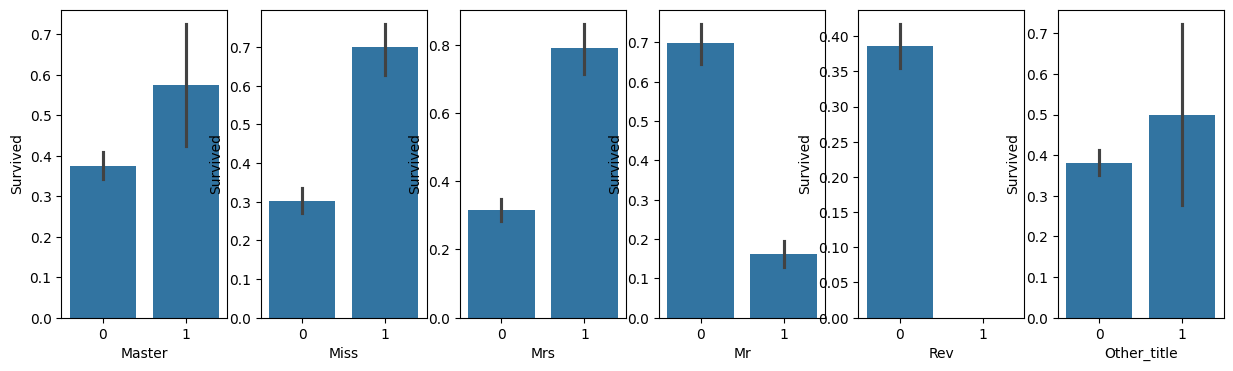

Master
0    1248
1      61
Name: count, dtype: int64
Miss
0    1047
1     262
Name: count, dtype: int64
Mrs
0    1108
1     201
Name: count, dtype: int64
Mr
1    761
0    548
Name: count, dtype: int64
Rev
0    1301
1       8
Name: count, dtype: int64
Other_title
0    1287
1      22
Name: count, dtype: int64


In [11]:
data_df['Master'] = data_df['Name'].str.contains('Master').astype(int)
data_df['Miss'] = data_df['Name'].str.contains('Miss').astype(int) | data_df['Name'].str.contains('Ms').astype(int)
data_df['Mrs'] = data_df['Name'].str.contains('Mrs').astype(int)
data_df['Mr'] = data_df['Name'].str.contains('Mr. ').astype(int)
data_df['Rev'] = data_df['Name'].str.contains('Rev').astype(int)
data_df['Other_title'] = 1- (data_df['Master'] | data_df['Miss'] | data_df['Mrs'] | data_df['Mr'] | data_df['Rev']).astype(int)

data_df['Title_value'] = data_df['Mr'] + data_df['Miss']*2 + data_df['Mrs']*3 + data_df['Other_title'] + data_df['Master']*4
 
train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()
print(train_df.head(5))
# plot title vs survived
fig, axs = plt.subplots(1, 6, figsize=(15, 4))
sns.barplot(x='Master', y='Survived', data=train_df, ax=axs[0])
sns.barplot(x='Miss', y='Survived', data=train_df, ax=axs[1])
sns.barplot(x='Mrs', y='Survived', data=train_df, ax=axs[2])
sns.barplot(x='Mr', y='Survived', data=train_df, ax=axs[3])
sns.barplot(x='Rev', y='Survived', data=train_df, ax=axs[4])
sns.barplot(x='Other_title', y='Survived', data=train_df, ax=axs[5])
plt.show()
# count title values total in data
print(data_df['Master'].value_counts())
print(data_df['Miss'].value_counts())
print(data_df['Mrs'].value_counts())
print(data_df['Mr'].value_counts())
print(data_df['Rev'].value_counts())
print(data_df['Other_title'].value_counts())

In [12]:
# Calculate Family_Size from SibSp and Parch
data_df['Family_Size'] = data_df['Parch'] + data_df['SibSp']
# Feature Engineering: Creating interaction terms as an example
data_df['IsAlone'] = (data_df['Family_Size'] == 0).astype(int) # Family_value 3
data_df['SmallFamily'] = ((data_df['Family_Size'] > 0) & (data_df['Family_Size'] < 5)).astype(int) # Family_value = 2
data_df['LargeFamily'] = (data_df['Family_Size'] >= 5).astype(int) #Family_value = 1

data_df['Family_value'] = (data_df['Family_Size'] >= 5).astype(int) * 1 + ((data_df['Family_Size'] > 0) & (data_df['Family_Size'] < 5)).astype(int) * 2 + (data_df['Family_Size'] == 0).astype(int) *3 /10

# Family_title = Title_value * Family_value
data_df['Family_title'] = data_df['Family_value'] * data_df['Title_value']

# drop family size
data_df = data_df.drop(columns='Family_Size')

# Create copies of the slices to avoid SettingWithCopyWarning
train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()


In [13]:
sex_mapping = {'female':0, 'male':1}
data_df['Sex'] = data_df['Sex'].map(sex_mapping).astype(int)

# If 'Sex' is NaN, set it to 1
data_df['Sex'] = data_df['Sex'].fillna(1)

train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()

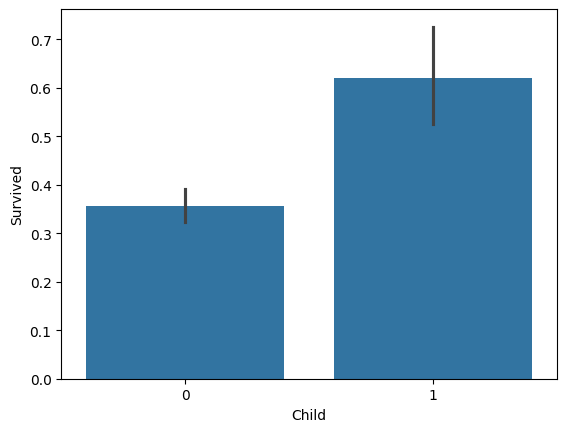

Child
0    1178
1     131
Name: count, dtype: int64


In [14]:
data_df['Child'] = 0
data_df.loc[(data_df['Age'] < 18) & (data_df['Sex'] == 0), 'Child'] = 1
data_df.loc[(data_df['Age'] < 16) & (data_df['Sex'] == 1), 'Child'] = 1

train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()

# Plot the survival probability for children and show how many children survived
sns.barplot(x='Child', y='Survived', data=train_df)
plt.show()
print(data_df['Child'].value_counts())


In [15]:
print(data_df.head(3))

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   

   Ticket  Cabin  ...  Mr  Rev  Other_title Title_value IsAlone  SmallFamily  \
0       0      1  ...   1    0            0           1       0            1   
1       0      0  ...   0    0            0           3       0            1   
2       0      1  ...   0    0            0           2       1            0   

   LargeFamily  Family_value  Family_title  Child  
0            0           2.0           2.0      0  
1            0           2.0           6.0      0  
2            0           0.3           0.6      0  



In [16]:
from sklearn.impute import KNNImputer

print(data_df.isna().sum().sum())
imp_features = ['Pclass', 'FareBin_Code', 'IsAlone', 'Mr', 'Mrs', 'Miss', 'Age']

imputer = KNNImputer(n_neighbors=10, missing_values=np.nan)
imputer.fit(data_df[imp_features])
data_df.loc[:, imp_features] = pd.DataFrame(imputer.transform(data_df[imp_features]), index=data_df.index, columns = imp_features)
print(data_df.isna().sum())


681
PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Cabin                0
Embarked             0
GoodCabin            0
BadCabin             0
Title                0
Last_Name            0
Family_Survival      0
FareBin_Code         0
Master               0
Miss                 0
Mrs                  0
Mr                   0
Rev                  0
Other_title          0
Title_value          0
IsAlone              0
SmallFamily          0
LargeFamily          0
Family_value         0
Family_title         0
Child                0
dtype: int64


In [17]:
# # Training a model to predict missing ages

# # Selecting relevant features for the age prediction model
# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVR
# from sklearn.neural_network import MLPRegressor
# from sklearn.ensemble import GradientBoostingRegressor

# # Impute missing values in 'Survived' with the mean
# data_df['Survived'] = data_df['Survived'].fillna(data_df['Survived'].mean())

# features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'FareBin_Code', 'Title', 'Cabin', 'Ticket', 'IsAlone']
# target = 'Age'

# # Filtering out rows where 'Age' is not null for training the age prediction model
# age_train_df = data_df.loc[data_df['Age'].notnull(), features + [target]]

# # Splitting the data into features and target variable
# X = age_train_df[features]
# y = age_train_df[target]

# # Splitting data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Preprocessing: One-hot encoding for categorical variables
# categorical_features = ['Title']
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', categorical_transformer, categorical_features),
#     ], remainder='passthrough')

# rf_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', RandomForestRegressor(random_state=42))
# ])

# mlp_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', MLPRegressor())
# ])

# gb_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', GradientBoostingRegressor())
# ])


# # Define a function to perform grid search and print best parameters
# def perform_grid_search(pipeline, param_grid, x_train, y_train):
#     grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
#     grid_search.fit(x_train, y_train)
#     print(f"Best parameters: {grid_search.best_params_}")
#     print(f"Best score (MSE): {-grid_search.best_score_}")
#     return grid_search


# # Performing grid search for RandomForest
# rf_param_grid = {
#     'model__n_estimators': [490, 500, 510],
#     'model__max_depth': [4, 5, 6],
#     'model__min_samples_split': [4, 5, 6]
# }
# rf_grid_search = perform_grid_search(rf_pipeline, rf_param_grid, x_train, y_train)

# # Performing grid search for MLP
# mlp_param_grid = {
#     'model__hidden_layer_sizes': [(280, 280), (300, 300), (350, 350)],
#     'model__activation': ['identity', 'logistic', 'relu'],
#     'model__max_iter': [2000]  # Corrected parameter name
# }
# mlp_grid_search = perform_grid_search(mlp_pipeline, mlp_param_grid, x_train, y_train)

# # Performing grid search for GradientBoosting
# gb_param_grid = {
#     'model__n_estimators': [100, 200, 300],
#     'model__max_depth': [3, 5, 7]
# }
# gb_grid_search = perform_grid_search(gb_pipeline, gb_param_grid, x_train, y_train)


# # Adjust the impute_age function to use the best model or an ensemble of models
# def impute_age(row):
#     if pd.isnull(row['Age']):
#         input_df = pd.DataFrame([row[features]], columns=features)
#         # Obtain predictions from each model
#         rf_pred = rf_grid_search.predict(input_df)[0]
#         mlp_pred = mlp_grid_search.predict(input_df)[0]
#         gb_pred = gb_grid_search.predict(input_df)[0]
        
#         # Calculate the average of the predictions
#         avg_pred = (rf_pred + mlp_pred + gb_pred) / 3 
        
#         return avg_pred
#     else:
#         return row['Age']


# # Applying the impute_age function
# data_df['Age'] = data_df.apply(impute_age, axis=1)

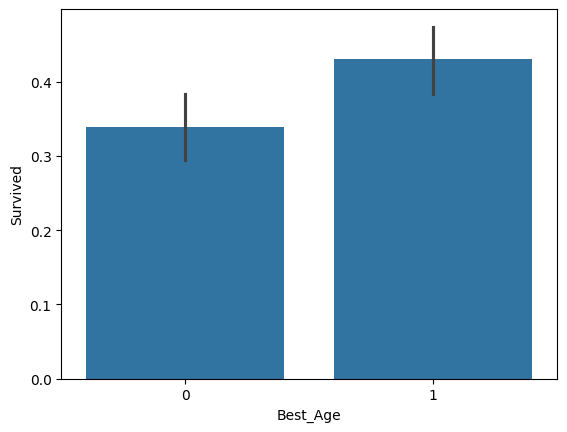

Best_Age
1    655
0    654
Name: count, dtype: int64
Child
0    1178
1     131
Name: count, dtype: int64


In [18]:
# Make a new row 'child' in data_df with a value of 1 if the passenger is a child, else 0. A child is defined as being under 18 years old for females (0) or under 16 years for males (1).
data_df.loc[(data_df['Age'] < 18) & (data_df['Sex'] == '0'), 'Child'] = 1
data_df.loc[(data_df['Age'] < 16) & (data_df['Sex'] == '1'), 'Child'] = 1

# Make a row 'best age' in data_df with a value of 1 if the passenger is female, age 24 or older or male 24 to 35, else 0
data_df['Best_Age'] = 0
data_df.loc[(data_df['Age'] >= 24) & (data_df['Sex'] == 0), 'Best_Age'] = 1
data_df.loc[(data_df['Age'] >= 24) & (data_df['Age'] <= 35) & (data_df['Sex'] == 1), 'Best_Age'] = 1

# Plot how many Best_Age passengers survived and how many did not
sns.barplot(x='Best_Age', y='Survived', data=data_df)
plt.show()
# Print the number of Best_Age passengers
print(data_df['Best_Age'].value_counts())

train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()

# Display the first ten rows of the updated training DataFrame to verify the changes
print(data_df['Child'].value_counts())

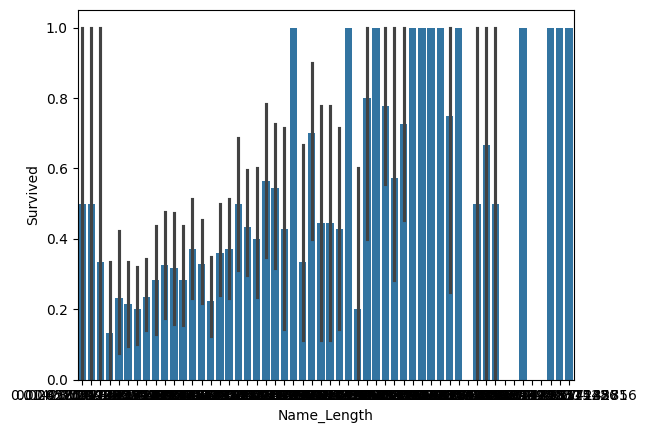

0


In [19]:
data_df["Name_Length"] = data_df.Name.str.replace("[^a-zA-Z]", "").str.len()
data_df["Name_Length"] = MinMaxScaler().fit_transform(data_df[["Name_Length"]])

# plot the survival probability for Name_Length
sns.barplot(x='Name_Length', y='Survived', data=data_df)
plt.show()

# how many names are longer than 25 characters
print(data_df[data_df['Name_Length'] > 25].shape[0])

train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()

In [20]:
data_df['AgeBin'] = pd.qcut(data_df['Age'], 4)
label = LabelEncoder()
data_df['AgeBin_Code'] = label.fit_transform(data_df['AgeBin'])
data_df.drop(columns=['Age', 'AgeBin'], inplace=True)

train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()

In [21]:
# Drop unnecessary columns from both datasets
columns_to_drop = ['SibSp', 'Parch', 'Last_Name', 'Title', 'Name', 'PassengerId', 'Ticket']
data_df.drop(columns=columns_to_drop, inplace=True)
train_df = data_df.loc[:890].copy()
test_df = data_df.loc[891:].copy()

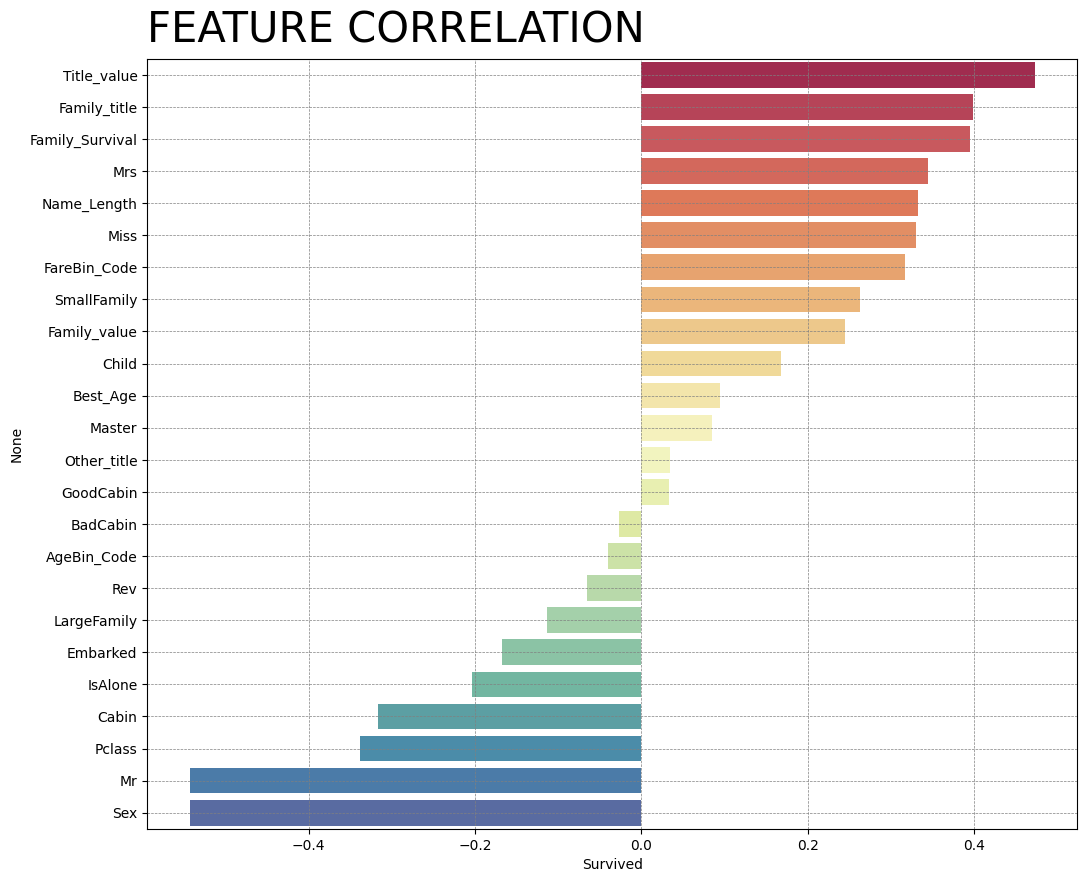

In [22]:
corr_mat = train_df.astype(float).corr()
corr_mat_fil = corr_mat.loc[:, 'Survived'].sort_values(ascending=False)
corr_mat_fil = pd.DataFrame(data=corr_mat_fil[1:])

plt.figure(figsize=(12,10))
bar = sns.barplot(x=corr_mat_fil.Survived, y=corr_mat_fil.index, data=corr_mat_fil, palette="Spectral", hue=corr_mat_fil.index)
title = bar.set_title("FEATURE CORRELATION", x=0.0, y=1.01, ha='left', fontweight=100, size=30)

# Add grid to the plot with customized settings
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', axis='both')  # Customize as needed

plt.show()


In [23]:
# drop survived from X
X = train_df.copy().drop('Survived', axis=1)
# y has to have only 'Survived' column from X
y = train_df.copy()['Survived'].astype(int)
# drop survived from X_test
X_test = test_df.copy().drop('Survived', axis=1)

print("X.shape", X.shape,"y.shape", y.shape, "X_test.shape", X_test.shape)

X.shape (891, 24) y.shape (891,) X_test.shape (418, 24)


In [24]:
print(X)


     Pclass  Sex  Cabin  Embarked  GoodCabin  BadCabin  Family_Survival  \
0         3    1      1         2          0         0             0.25   
1         1    0      0         0          0         0             0.25   
2         3    0      1         2          0         0             0.25   
3         1    0      0         2          0         0             0.00   
4         3    1      1         2          0         0             0.25   
..      ...  ...    ...       ...        ...       ...              ...   
886       2    1      1         2          0         0             0.25   
887       1    0      0         2          0         0             0.25   
888       3    0      1         2          0         0             0.00   
889       1    1      0         0          0         0             0.25   
890       3    1      1         1          0         0             0.25   

     FareBin_Code  Master  Miss  ...  Title_value  IsAlone  SmallFamily  \
0               0       

In [25]:
# Initialize StandardScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Define the hyperparameters for the SVC
svc_hyperparams = {
    'C': [98, 99, 100], 
    'kernel': ['linear', 'rbf'], # Kernel function
    'gamma': ['scale', 'auto', ], # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'class_weight': ['balanced', None] # Weights associated with classes
}

# Initialize the GridSearchCV with the SVC estimator
svc_gd = GridSearchCV(estimator=SVC(probability=True), param_grid=svc_hyperparams, verbose=True, cv=10, scoring="accuracy")

# Fit the model to the scaled training data
svc_gd.fit(X_scaled, y)

# Print the best score and the best estimator for SVC
print("SVC Best Score:", svc_gd.best_score_)
print("SVC Best Estimator:", svc_gd.best_estimator_)

# ************************************************************************************************************************************************************

# Define the hyperparameters for the RandomForestClassifier
rf_hyperparams = {
    'n_estimators': [190, 200, 210], # Number of trees in the forest
    'max_depth': [15, 20, 25], # Maximum depth of the tree
    'min_samples_split': [4, 5, 6], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3] # Minimum number of samples required to be at a leaf node
}

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

# Initialize the GridSearchCV with the RandomForestClassifier estimator
rf_gd = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_hyperparams, verbose=True, cv=10, scoring="accuracy")

# Fit the model to the scaled training data
rf_gd.fit(X_scaled, y)

# Print the best score and the best estimator for RandomForestClassifier
print("RandomForestClassifier Best Score:", rf_gd.best_score_)
print("RandomForestClassifier Best Estimator:", rf_gd.best_estimator_)

# ************************************************************************************************************************************************************


# Define the hyperparameters for the KNeighborsClassifier
knn_hyperparams = {
    'n_neighbors': [6, 7, 8, 9], # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], # Algorithm used to compute the nearest neighbors
    'p': [1, 2] # Power parameter for the Minkowski metric
}

# Initialize the GridSearchCV with the KNeighborsClassifier estimator
knn_gd = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_hyperparams, verbose=True, cv=10, scoring="accuracy")

# Fit the model to the scaled training data
knn_gd.fit(X_scaled, y)

# Print the best score and the best estimator for KNeighborsClassifier
print("KNeighborsClassifier Best Score:", knn_gd.best_score_)
print("KNeighborsClassifier Best Estimator:", knn_gd.best_estimator_)


# ************************************************************************************************************************************************************

# Define the hyperparameters for the LogisticRegression

lr_hyperparams = {
    'penalty': ['l2'],
    'C': [0.9, 1, 1.1],
    'solver': ['liblinear', 'lbfgs'], 
    'class_weight': ['balanced', None]
}

# Initialize the GridSearchCV with the LogisticRegression estimator (updated)
lr_gd = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_hyperparams, verbose=True, cv=10, scoring="accuracy")

# Fit the model to the scaled training data
lr_gd.fit(X_scaled, y)

# Print the best score and the best estimator for LogisticRegression
print("LogisticRegression Best Score:", lr_gd.best_score_)
print("LogisticRegression Best Estimator:", lr_gd.best_estimator_)


# ************************************************************************************************************************************************************

# Define the hyperparameters for the MLPClassifier
mlp_hyperparams = {
    'hidden_layer_sizes': [(80, 80), (100, 100)], # The ith element represents the number of neurons in the ith hidden layer
    'activation': ['identity', 'logistic', 'tanh', 'relu'], # Activation function for the hidden layer
    'solver': ['adam'], # Optimizer for weight optimization
    'alpha': [0.08, 0.09, 0.1], # L2 penalty (regularization term) parameter
    'learning_rate': ['adaptive', 'constant', 'invscaling'], # Learning rate schedule for weight updates
    'max_iter': [1000] # Maximum number of iterations
}

# Initialize the GridSearchCV with the MLPClassifier estimator
mlp_gd = GridSearchCV(estimator=MLPClassifier(), param_grid=mlp_hyperparams, verbose=True, cv=2, scoring="accuracy")

# Fit the model to the scaled training data
mlp_gd.fit(X_scaled, y)

# Print the best score and the best estimator for MLPClassifier
print("MLPClassifier Best Score:", mlp_gd.best_score_)
print("MLPClassifier Best Estimator:", mlp_gd.best_estimator_)

# ************************************************************************************************************************************************************



# Initialize the VotingClassifier with the best estimators from GridSearchCV
voting_clf = VotingClassifier(estimators=[
    ('best_svc', svc_gd.best_estimator_),
    ('best_rf', rf_gd.best_estimator_),
    ('best_knn', knn_gd.best_estimator_),
    ('best_lr', lr_gd.best_estimator_),
    ('best_mlp', mlp_gd.best_estimator_),

], voting='soft')

# Fit the VotingClassifier to the scaled training data
voting_clf.fit(X_scaled, y)

# Predict the test data with the VotingClassifier
y_pred = voting_clf.predict(X_test_scaled)

# get passenger id from ./data/test.csv
test_df = pd.read_csv("./data/test.csv")

# Prepare the submission dataframe
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred
})

# Ensure the output directory exists
output_dir = './data'
os.makedirs(output_dir, exist_ok=True)

# Save the submission file
submission.to_csv(f'{output_dir}/gender_submission.csv', index=False)
print("Submission saved successfully!")
print("y_pred", y_pred)


Fitting 10 folds for each of 24 candidates, totalling 240 fits
SVC Best Score: 0.8372534332084893
SVC Best Estimator: SVC(C=99, gamma='auto', probability=True)
Fitting 10 folds for each of 81 candidates, totalling 810 fits
RandomForestClassifier Best Score: 0.8406367041198501
RandomForestClassifier Best Estimator: RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=210)
Fitting 10 folds for each of 64 candidates, totalling 640 fits
KNeighborsClassifier Best Score: 0.837278401997503
KNeighborsClassifier Best Estimator: KNeighborsClassifier(n_neighbors=7, p=1)
Fitting 10 folds for each of 12 candidates, totalling 120 fits
LogisticRegression Best Score: 0.8451186017478152
LogisticRegression Best Estimator: LogisticRegression(C=0.9, solver='liblinear')
Fitting 2 folds for each of 72 candidates, totalling 144 fits
MLPClassifier Best Score: 0.8339043684184008
MLPClassifier Best Estimator: MLPClassifier(activation='logistic', alpha

In [27]:
# from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
# from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
# from sklearn.metrics import confusion_matrix, roc_curve
# from sklearn.metrics import precision_score, recall_score, f1_score

# import tensorflow as tf # type: ignore
# from tensorflow import keras # type: ignore
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier# type: ignore
# from tensorflow.keras.models import Sequential# type: ignore
# from tensorflow.keras.utils import plot_model# type: ignore
# from tensorflow.keras.layers import Input, Dense, Dropout, AlphaDropout, BatchNormalization,Concatenate, concatenate# type: ignore
# from tensorflow.keras.optimizers import SGD, RMSprop, Adamax, Adagrad, Adam, Nadam, SGD# type: ignore
# from tensorflow.keras.regularizers import l2# type: ignore
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping# type: ignore
# from tensorflow.keras.metrics import *# type: ignore